<a href="https://colab.research.google.com/github/Meenumol-KJ/DCGAN/blob/master/DCGANDENSE_FINAL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import time
import os
import re
import glob
from PIL import Image
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image
SIZE = 256

image_path = '/content/drive/MyDrive/Dataset/Dataset/photos'
img_array = []

sketch_path = '/content/drive/MyDrive/Dataset/Dataset/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)

    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resizing images
    image = cv2.resize(image, (SIZE, SIZE))

    # normalizing image
    image = image.astype('float32') / 255.0

    #appending normal normal image
    img_array.append(img_to_array(image))
    # Image Augmentation

    # horizontal flip
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))


for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)

    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resizing images
    image = cv2.resize(image, (SIZE, SIZE))

    # normalizing image
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))

    #Image Augmentation
    # horizontal flip
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

100%|██████████| 198/198 [01:40<00:00,  1.97it/s]


In [ ]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 1584
Total number of images: 1504


In [ ]:
# defining function to plot images pair
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches)

    plt.show()

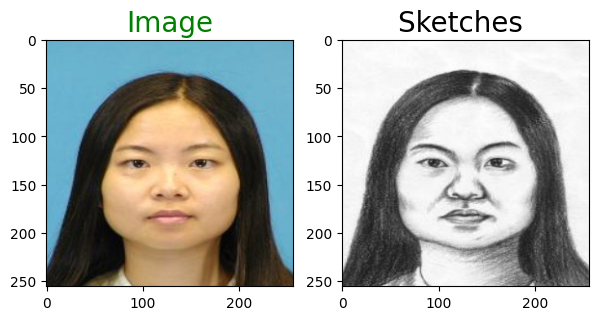

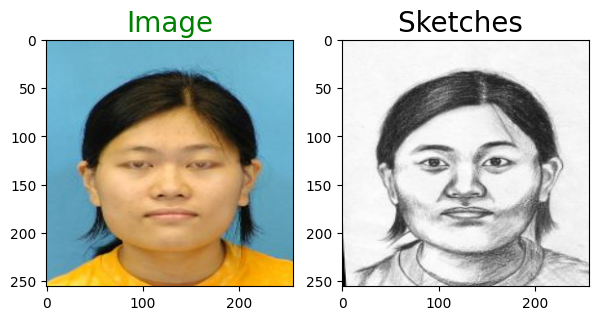

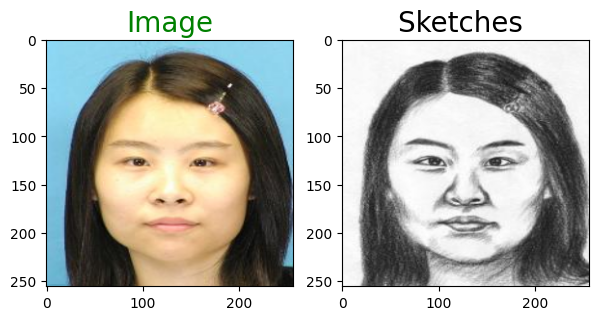

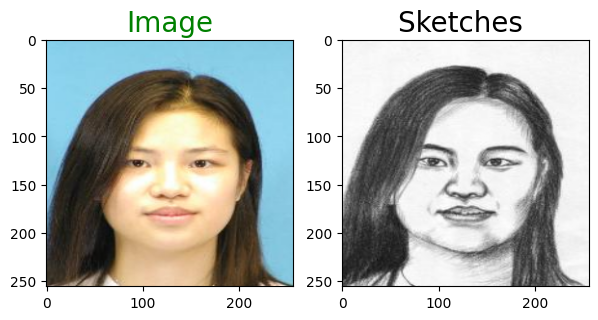

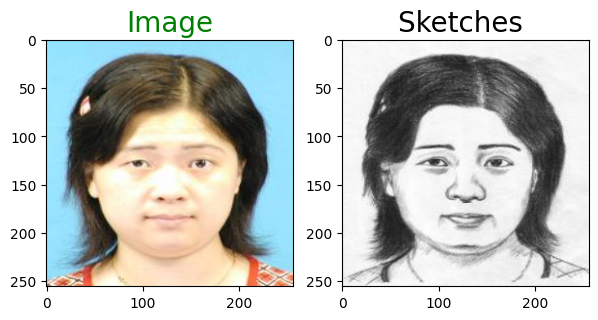

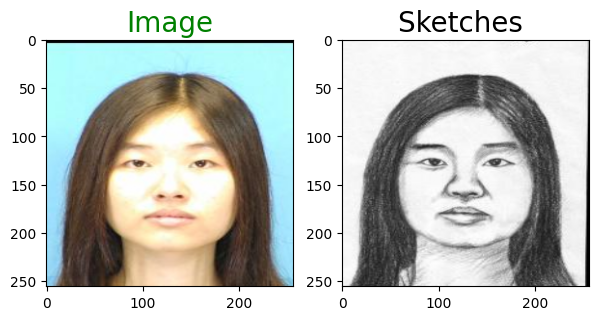

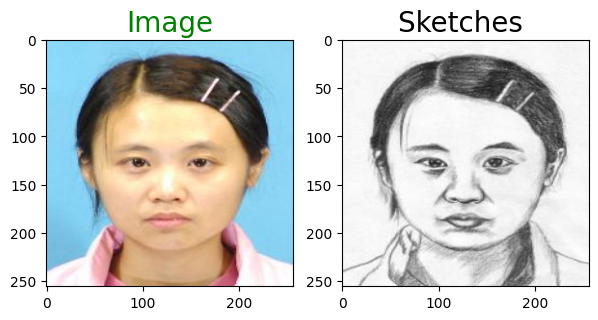

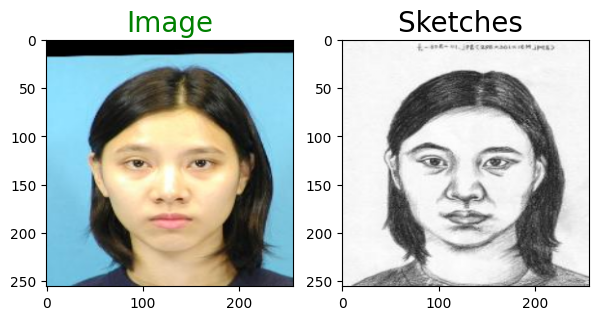

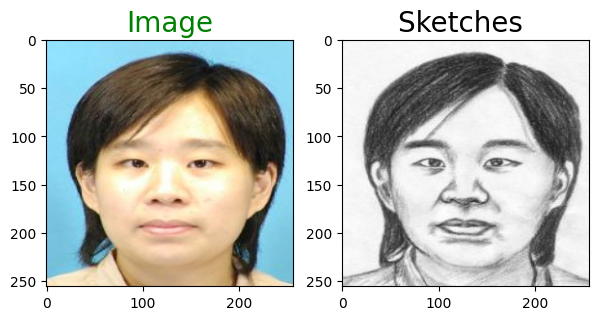

In [ ]:
ls = [i for i in range(0,65,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])


In [ ]:
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


In [ ]:
def create_train_sets(sketches, photos):
    X_train = []
    Y_train= []

    for i in xrange(len(sketches)):
        path = sketches[i]
        temp_img = image.load_img(path, target_size=(128,128,3))
        temp_img = image.img_to_array(temp_img)
        X_train.append(temp_img)


    for i in xrange(len(photos)):
        path = photos[i]
        temp_img = image.load_img(path, target_size=(128,128,3))
        temp_img = image.img_to_array(temp_img)
        Y_train.append(temp_img)

    X_train = np.array(X_train)
    Y_train = np.array(Y_train)

    X_train = X_train.astype('float32')
    Y_train = Y_train.astype('float32')

    X_train = X_train/255
    Y_train = Y_train/255
    X_train = X_train * 2 -1
    Y_train = Y_train *2 -1

    return X_train, Y_train
print('Training Complete')

Training Complete


In [ ]:
X_train = []
Y_train = []

In [ ]:
def minb_disc(x):
    diffs = K.expand_dims(x, 3) - K.expand_dims(K.permute_dimensions(x, [1, 2, 0]), 0)
    abs_diffs = K.sum(K.abs(diffs), 2)
    x = K.sum(K.exp(-abs_diffs), 2)

    return x


def lambda_output(input_shape):
    return input_shape[:2]


def discriminator(img_dim, nb_patch):

    list_input = [Input(img_dim,name="disc_input_%s" % i) for i in range(16)]
    nb_filters = 64
    nb_conv = int(np.floor(np.log(img_dim[1])/np.log(2)))
    list_filters = [nb_filters*min(8,(2**i)) for i in range(nb_conv)]

    x_input = Input(img_dim, name="discriminator_input")

    x = Conv2D(list_filters[0], (3,3), strides=(2,2), name="disc_conv2d_1", padding='same')(x_input)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.2)(x)

    for i,f in enumerate(list_filters[1:]):
        name = "disc_conv2d_%s" %(i+2)
        x = Conv2D(f, (3,3), strides=(2,2), name=name,padding='same')(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(0.2)(x)

    x_flat = Flatten()(x)
    x = Dense(2, activation='softmax', name="disc_dense")(x_flat)

    PatchGAN = Model(input=[x_input], output=[x,x_flat], name='PatchGAN')

    x = [PatchGAN(patch)[0] for patch in list_input]
    x_mbd = [PatchGAN(patch)[1] for patch in list_input]

    x = merge(x, mode="concat", name="merge_feat")
    x_mbd = merge(x_mbd, mode="concat", name="merge_feat_mdb")

    M = Dense(500, bias=False, activation=None)
    MBD = Lambda(minb_disc, output_shape=lambda_output)

    x_mbd = M(x_mbd)
    x_mbd = Reshape((100,5))(x_mbd)
    x_mbd = MBD(x_mbd)
    x = merge([x,x_mbd], mode='concat')

    x_out = Dense(2, activation='softmax', name="disc_output")(x)

    discriminator_model= Model(input=list_input, output=[x_out], name="DCGAN_discriminator")

    return discriminator_model
for i in tqdm (range (100),
            desc="Loading…",
            ascii=False, ncols=75):
    time.sleep(0.05)
print("Process Complete.")

Loading…: 100%|██████████████████████████| 100/100 [00:05<00:00, 19.61it/s]

Process Complete.


In [ ]:
def DCGAN(generator, discriminator_model, img_dim, patch_size):
    gen_input = Input(shape=img_dim, name="DCGAN_input")
    generated_image = generator(gen_input)

    h, w = img_dim[:-1]
    ph, pw = patch_size

    list_row_idx = [(i*ph, (i+1)*pw) for i in range(h/ph)]
    list_col_idx = [(i*pw, (i+1)*pw) for i in range(w/pw)]

    list_gen_patch =[]

    for row_idx in list_row_idx:
        for col_idx in list_col_idx:
            x_patch = Lambda(lambda z: z[:, row_idx[0]:row_idx[1], col_idx[0]:col_idx[1], :])(generated_image)
            list_gen_patch.append(x_patch)

    DCGAN_output = discriminator_model(list_gen_patch)
    DCGAN = Model(input=[gen_input], output=[generated_image, DCGAN_output], name="DCGAN")
    return DCGAN
for i in tqdm (range (100),
            desc="DCGAN…",
            ascii=False, ncols=75):
    time.sleep(0.10)
print("DCGAN Model Generation Complete")



DCGAN…: 100%|████████████████████████████| 100/100 [00:10<00:00,  9.86it/s]

DCGAN Model Generation Complete


In [ ]:
def discriminator_loss(y_true,y_pred):
    BATCH_SIZE=10
    return K.mean(K.binary_crossentropy(K.flatten(y_pred), K.concatenate([K.ones_like(K.flatten(y_pred[:BATCH_SIZE])),K.zeros_like(K.flatten(y_pred[:BATCH_SIZE])) ]) ), axis=-1)

def mean_squared_error(y_true, y_pred):
    return 10*K.mean(K.square(y_pred - y_true), axis=-1)

def discriminator_on_generator_loss(y_true,y_pred):
    BATCH_SIZE=10
    return K.mean(K.binary_crossentropy(K.flatten(y_pred), K.ones_like(K.flatten(y_pred))), axis=-1)

def l1_loss(y_true, y_pred):
    return K.sum(K.abs(y_pred - y_true), axis=-1)

In [ ]:
def getPatch(X, patch_size):
    list_X = []
    list_row_idx = [(i * patch_size[0], (i + 1) * patch_size[0]) for i in range(X.shape[1] / patch_size[0])]
    list_col_idx = [(i * patch_size[1], (i + 1) * patch_size[1]) for i in range(X.shape[2] / patch_size[1])]

    for row_idx in list_row_idx:
        for col_idx in list_col_idx:
            list_X.append(X[:, row_idx[0]:row_idx[1], col_idx[0]:col_idx[1], :])

    return list_X

In [ ]:
from keras.layers.advanced_activations import LeakyReLU, PReLU
def generator():


    input_shape=((128,128,3))
    img_rows,img_cols=128,128

    inputs = Input((img_rows,img_cols,3))
    conv1 = Conv2D(32, (7,7), strides=(1,1) ,padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation("relu")(conv1)

    conv2 = Conv2D(64, (3,3), strides=(2,2),padding="same" )(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation("relu")(conv2)

    conv3 = Conv2D(128, (3,3), strides=(2,2),padding="same")(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation("relu")(conv3)

    b1 = Conv2D(128, (3,3), padding="same")(conv3)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block1 = keras.layers.add([b1,b2])

    b1 = Conv2D(128, (3,3), padding="same")(block1)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block2 = keras.layers.add([b1,b2])

    b1= Conv2D(128, (3,3), padding="same")(block2)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block3 = keras.layers.add([b1,b2])

    b1 = Conv2D(128, (3,3), padding="same")(block3)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block4 = keras.layers.add([b1,b2])

    b1 = Conv2D(128, (3,3), padding="same")(block4)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block5 = keras.layers.add([b1,b2])

    b1 = Conv2D(128, (3,3), padding="same")(block5)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block6 = keras.layers.add([b1,b2])

    u1 = Conv2DTranspose(64, (3,3), strides=(2, 2),padding="same")(block6)
    u1 = BatchNormalization()(u1)
    u1 = Activation("relu")(u1)

    u2 = Conv2DTranspose(32, (3,3), strides=(2, 2),padding="same")(u1)
    u2 = BatchNormalization()(u2)
    u2 = Activation("relu")(u2)

    conv4 = Conv2D(3, (3,3), strides=(1,1),padding="same" )(u2)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation("relu")(conv4)

    model = Model(inputs=[inputs], outputs=[conv4])
    return model

ModuleNotFoundError: No module named 'keras.layers.advanced_activations'

In [ ]:
from keras.layers.advanced_activations import LeakyReLU, PReLU
def discriminator():

    inputs = Input((128,128,3))
    conv1 = Conv2D(64, (4,4), strides=(2,2) )(inputs)
    conv1 = Activation(LeakyReLU(alpha=.2))(conv1)

    conv2 = Conv2D(128, (4,4), strides=(2,2) )(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation(LeakyReLU(alpha=.2))(conv2)

    conv3 = Conv2D(256, (4,4), strides=(2,2) )(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation(LeakyReLU(alpha=.2))(conv3)

    conv4 = Conv2D(512, (4,4), strides=(2,2) )(conv3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation(LeakyReLU(alpha=.2))(conv4)

    out = Flatten()(conv4)
    out = Dense(1, activation='sigmoid')(out)

    model = Model(inputs=[inputs], outputs=[out])

    return model

In [ ]:
def full_model(g,d):
    inputs = Input((128,128,3))
    x_generator = g(inputs)

    #merged = concatenate([inputs, x_generator],axis=0)
    #merged = merge([inputs, x_generator], mode='concat',concat_axis=0)
    d.trainable = False
    x_discriminator = d(x_generator)

    model = Model(inputs=inputs, outputs=[x_generator,x_discriminator])

    return model

In [ ]:
def num_patches(output_img_dim = (3, 256, 256), sub_patch_dim =(64, 64)):
    nb_non_overlapping_patches =  (output_img_dim[1] / sub_patch_dim[0]) * (output_img_dim[2] / sub_patch_dim[1])
    patch_disc_img_dim = (output_img_dim[0], sub_patch_dim[0], sub_patch_dim[1])
    return int(nb_non_overlapping_patches), patch_disc_img_dim

In [ ]:
num_epochs=30
batch_size=30
from keras import backend as K
smooth = 1.
def discriminator_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.binary_crossentropy(K.flatten(y_pred), K.concatenate([K.ones_like(K.flatten(y_pred[:BATCH_SIZE])),K.zeros_like(K.flatten(y_pred[:BATCH_SIZE])) ]) ), axis=-1)

def discriminator_on_generator_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.binary_crossentropy(K.flatten(y_pred), K.ones_like(K.flatten(y_pred))), axis=-1)

def generator_l1_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.abs(K.flatten(y_pred) - K.flatten(y_true)), axis=-1)

def least_absolute_error(y_true, y_pred):
    return (K.abs(y_pred - y_true))

def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

def mean_squared_error(y_true, y_pred):
    return 10*K.mean(K.square(y_pred - y_true), axis=-1)



In [ ]:
def downsample(filters, size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(keras.layers.Conv2D(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_batch_normalization:
        downsample.add(keras.layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample

In [ ]:
def upsample(filters, size, apply_dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(keras.layers.Conv2DTranspose(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_dropout:
        upsample.add(tf.keras.layers.Dropout(0.1))
    upsample.add(tf.keras.layers.LeakyReLU())
    return upsample

In [ ]:
def model():
    encoder_input = keras.Input(shape = (SIZE, SIZE, 3))
    x = downsample(16, 4, False)(encoder_input)
    x = downsample(32,4)(x)
    x = downsample(64,4,False)(x)
    x = downsample(128,4)(x)
    x = downsample(256,4)(x)

    encoder_output = downsample(512,4)(x)

    decoder_input = upsample(512,4,True)(encoder_output)
    x = upsample(256,4,False)(decoder_input)
    x = upsample(128,4, True)(x)
    x = upsample(64,4)(x)
    x = upsample(32,4)(x)
    x = upsample(16,4)(x)
    x = tf.keras.layers.Conv2DTranspose(8,(2,2),strides = (1,1), padding = 'valid')(x)
    decoder_output = tf.keras.layers.Conv2DTranspose(3,(2,2),strides = (1,1), padding = 'valid')(x)


    return tf.keras.Model(encoder_input, decoder_output)

In [ ]:
# to get summary of model
model = model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 127, 127, 16)      768       
                                                                 
 sequential_1 (Sequential)   (None, 62, 62, 32)        8320      
                                                                 
 sequential_2 (Sequential)   (None, 30, 30, 64)        32768     
                                                                 
 sequential_3 (Sequential)   (None, 14, 14, 128)       131584    
                                                                 
 sequential_4 (Sequential)   (None, 6, 6, 256)         525312    
                                                                 
 sequential_5 (Sequential)   (None, 2, 2, 512)         209920